## Tanzania Tourism Prediction by Pycon Tanzania Community

## Problem Definition
The objective of this hackathon is to develop a machine learning model to predict what a tourist will spend when visiting Tanzania.
The model can be used by different tour operators and the Tanzania Tourism Board to automatically
help tourists across the world estimate their expenditure before visiting Tanzania.

## Data
The data is downloaded from zindi: https://zindi.africa/competitions/tanzania-tourism-prediction
The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.
The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately predict tourist expenditure when visiting Tanzania.

## Evaluation
The evaluation metric for this competition is Mean Absolute Error.

For every row in the dataset, submission files should contain 2 columns: test_id and total_cost

## Features

ID,	country, age_group,	travel_with, total_female,	total_male,	purpose, main_activity,	info_source, tour_arrangement,	package_transport_int,
package_accomodation, package_food, package_transport_tz, package_sightseeing, package_guided_tour,	package_insurance,	
night_mainland,	night_zanzibar,	payment_mode,	first_trip_tz,	most_impressing and	total_cost


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Importing training data set
df_train =pd.read_csv("C:/Users/JOHNKENNEDY/Desktop/sample_project_1/projects/Tanzania Tourism Prediction by Pycon Tanzania Community/Train.csv",
low_memory=False)

# Importing test data set
df_test =pd.read_csv("C:/Users/JOHNKENNEDY/Desktop/sample_project_1/projects/Tanzania Tourism Prediction by Pycon Tanzania Community/Test.csv",
low_memory=False)

#Importng sample submission
sample_submission =pd.read_csv("C:/Users/JOHNKENNEDY/Desktop/sample_project_1/projects/Tanzania Tourism Prediction by Pycon Tanzania Community/SampleSubmission.csv",
low_memory=False)

In [ ]:
df_test.head()

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [9]:
df_train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [10]:
df_test.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


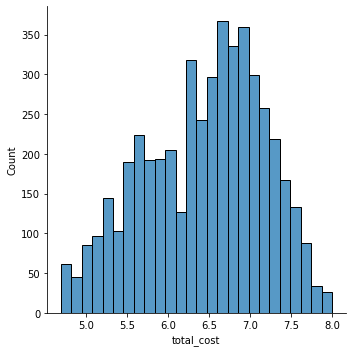

In [11]:
sns.displot(np.log10(df_train['total_cost']));

In [ ]:
fig, ax =plt.subplots()
ax.bar(df_train["total_male"] , df_train["total_female"] )

KeyboardInterrupt: 

In [ ]:
#compare target column with sex column
pd.crosstab(df_train.total_cost, df_train.total_male)

In [ ]:
#check the distributuion of the sex (male) column with histogram
#df_train.total_male.plot.hist();
sns.displot(np.log10(df_train['total_male']));

In [ ]:
#check the distributuion of the sex (female) column with histogram
#df_train.total_female.plot.hist();
sns.displot(np.log10(df_train['total_female']));